In [262]:
import pandas as pd

df = pd.read_csv("./mall.csv")
df.copy()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [263]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [264]:
# check for null values
df.copy().isnull().sum()
df.drop("customer_id", axis=1, inplace=True)

In [265]:
X = df[["annual_income", "spending_score"]]

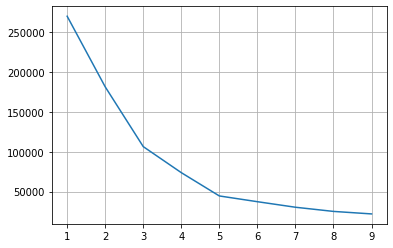

In [266]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

number_of_clusters = range(1, 10)
distorsions = []

for k in number_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=45)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

sns.lineplot(x=number_of_clusters, y=distorsions)
plt.grid(True)

chosen_number_of_cluster = 5

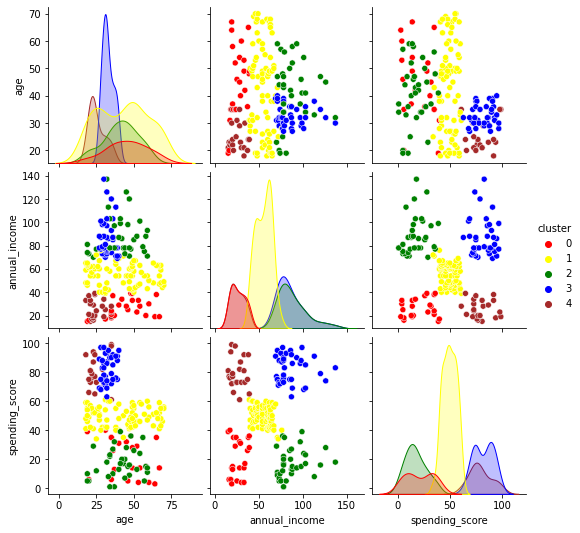

In [267]:
# predict using chosen number of clusters and predict clusters for data
kmeans = KMeans(n_clusters=chosen_number_of_cluster, random_state=45)
kmeans.fit(X)
df["cluster"] = kmeans.predict(X)

sns.pairplot(data=df, hue="cluster", palette=["red", "yellow", "green", "blue", "brown"])

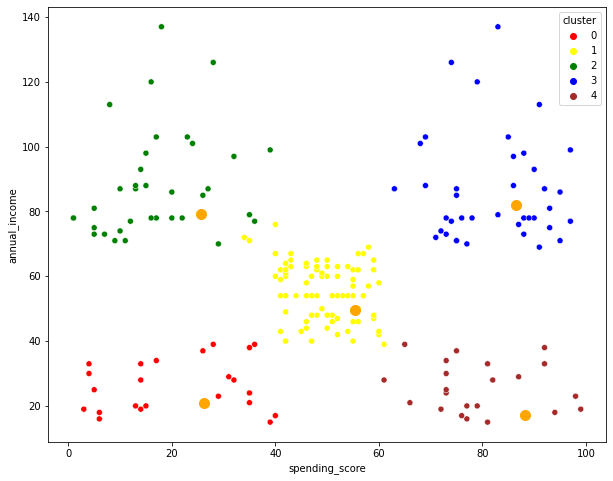

In [269]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10,8))
sns.scatterplot(x=df.spending_score, y=df.annual_income, hue=df.cluster, palette=["red", "yellow", "green", "blue", "brown"])
plt.scatter(x=centroids[:,0], y=centroids[:,1], c='#ffa500', s=100)